# **Planteamiento del Problema**


**Abstract**

En el siguiente dataset tenemos los logros academicos de la poblacion de estudiantes de dos escuelas secundarias de portugal.los datos fueron recolectados a traves  de encuestas y reportes de las escuelas. en el cual podemos destacar los tipos de datos obtenidos en grados academicos y sociocultares.
determinando los grados academicos como el fenomeno principal en cuestion de estudio, debemos empezar a preguntarnos de que manera las distintas variables del dataset se relacionan con este para poder determinar si son realmente influyentes o no. por lo tanto se procedera a aplicar metodos estadisticos para poder estudiar y visualizar las relaciones entre estas. esto es informacion relevante para los padres, tutores, profesores, escuelas, universidades, gobierno y entidades educativas

**Definicion del Objetivo**

  Determinar la relevancia de las datos obtenidos a una poblacion de estudiantes mediante encuestas realizadas en 2 diferentes escuelas(GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) con la variable objetivo G3  para poder dar insights de como afectan el promedio final academico desde un punto de vista de entorno socio cultural versus rendimiento academico.

**Contexto Comercial**

hemos de tener en cuenta que la educacion es un negocio y tambien es una inversion,  para los padres, tutores o entidades que proporcionen becas que invierten en los/o potenciales alumnos, es importante para estos poder analizar el comportamiento academico de los estudiantes, para poder detectar en el caso de los padres u/o tutores si el alumno podria tener dificultades para rendir en el ambito escolar o en el caso de alguna entidad que proporcione becas si las condiciones socio/academicas del alumno son propicias para invertir en el.

**Problema Comercial**

determinar que variables son mas relevantes entre los estudiantes que reprueban

**Preguntas de interes**

*   Afecta el acceso a Internet a la nota final de los estudiantes?
*   Afecta el tamaño del nucleo familiar al rendimiento?
*   afecta la educacion de los apdres al rendimiento escolar?
*   afecta el tiempo de estudio al promedio?





# Importacion de Librerias

In [52]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import seaborn as sns
# split del dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# evaluacion 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
#encoders
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
#Optimizacion de hiperparametros
import xgboost as xgb
#pandas prof
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling as pp
import pandas as pd
import os
from pandas_profiling import ProfileReport
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## importacion del Dataset

In [2]:
#Importe del Dataset
DFE=pd.read_csv("/content/student-por.csv")


# EDA

## Analisis de los Datos y Metadata

**Informacion sobre los  atributos**
1. school - escuela del estudiante (binario: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - genero del estudiante (binario: 'F' - femenino o 'M' - masculino)
3. age - edad  (numerico: va desde 15 thasta 22)
4. address - direccion (binario: 'U' - urbano o 'R' - rural)
5. famsize - tamaño del grupo familiar (binario: 'LE3' - menos o igual a 3 'GT3' - mayor que 3 3)
6. Pstatus - estado de cohabitacion de los padres (binario: 'T' - viviendo juntos or 'A' - aparte)
7. Medu -educacion de la madre (numerico: 0 - ninguna, 1 - primaria (4th grade), 2 - 5to hasta 9no grado, 3 - educacion secundaria o 4 - educacion universitaria)
8. Fedu - educacion del padre (numerico: 0 - ninguna, 1 - educacion primaria (4th grade), 2 - 5to hasta el 9no grado, 3 - educacion secundaria or 4 - universitaria)
9. Mjob - trabajo de la madre (nominal: 'maestra', 'health' si trabaja en salud ,  'services' si trabaja en servicios publicos (policia, o administrador), 'at_home' si esta en casa o 'other' otros)
10. Fjob - trabajo del padre (nominal: 'maestro', 'health' si trabaja en el sector salud,  'services' si trabaja en servicios publicos (administrativo o policia), 'at_home' si esta en casa  'other' otros)
11. reason - razon para ir a esa escuela (nominal: 'home' cerca de su casa, 'reputation' reputacion, 'course' preferencia en el curso academico o 'other' otros)
12. guardian - guardian del estudiante (nominal: 'mother' madre, 'father' padre o 'other' otros)
13. traveltime - tiempo de viaje de la escuela a la casa (numerico: 1 - <15 min., 2 - 15 hasta 30 min., 3 - 30 min. hasta 1 hr, o 4 - >1 hr)
14. studytime - tiempo de estudio semanal (numerico: 1 - <2 hr, 2 - 2 hasta 5 hr, 3 - 5 hasta 10 hr, o 4 - >10 hr)
15. failures - numero de reprobaciones pasadas (numerico: n if 1<=n<3, else 4)
16. schoolsup - soporte escolar educativo (binario: yes or no)
17. famsup - soporte familiar a la educacion (binario: yes or no)
18. paid - clases extras pagas (en matematicas o portugues) (binario: yes or no)
19. activities - actividades extra curriculares (binario: yes or no)
20. nursery - si fue a la guarderia (binario: yes or no)
21. higher - si el alumno desea continuar en estudios superiores (binario: yes or no)
22. internet - acceso al internet en casa (binario: yes or no)
23. romantic - si tiene una relacion romantica (binario: yes or no)
24. famrel - calidad de la relacion familiar (numerico: desde 1 - muy malo hasta 5 - exelente)
25. freetime - tiempo libre despues de la escuela (numerico: desde 1 - muy bajo hasta 5 - muy alto)
26. goout - frecuencia de salida con amigos (numerico: desde 1 - muy bajo hasta 5 - muy alto)
27. Dalc - consumicion de alcohol entre semana (numerico: from 1 - very low hasta 5 - very high)
28. Walc - consumicion de alcohol en el finde de semana (numerico: desde 1 - muy bajo hasta 5 - muy alto)
29. health - estado de salud actual (numerico: desde 1 - muy mala hasta 5 - muy buena)
30. absences - ausencias escolares (numerico: desde 0 to 93)
estas notas estan relacionadadas con la materia en cuestion que vendia siendo P portugues
31. G1 - nota del primer periodo (numeric: desde 0 hasta 20)
32. G2 - nota del segundo periodo (numeric: desde 0 hasta 20)
33. G3 - nota final (numerico: desde 0 hasta 20, )


In [3]:
#esto es para poder apreciar como estan conformado los datos dentro de la tabla
#tambien se procede a imprimir para observar si cargo correctamente
print('Data Shape:',DFE.shape)
print(DFE.info())
display(DFE.head())



Data Shape: (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


##Valores Nulos

In [4]:
#vemos si tenemos valores nulos en el dataset
DFE.isnull().sum()
#podemos ver que no posee datos nulos y no se procedera a tratarlos



school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
#se proce a analizar estadisticamente los valores de los datos
DFE.dtypes
DFE.describe(include="all")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


##Analisis Multivariado

Text(0.5, 1.0, 'Mapa de Correlacion')

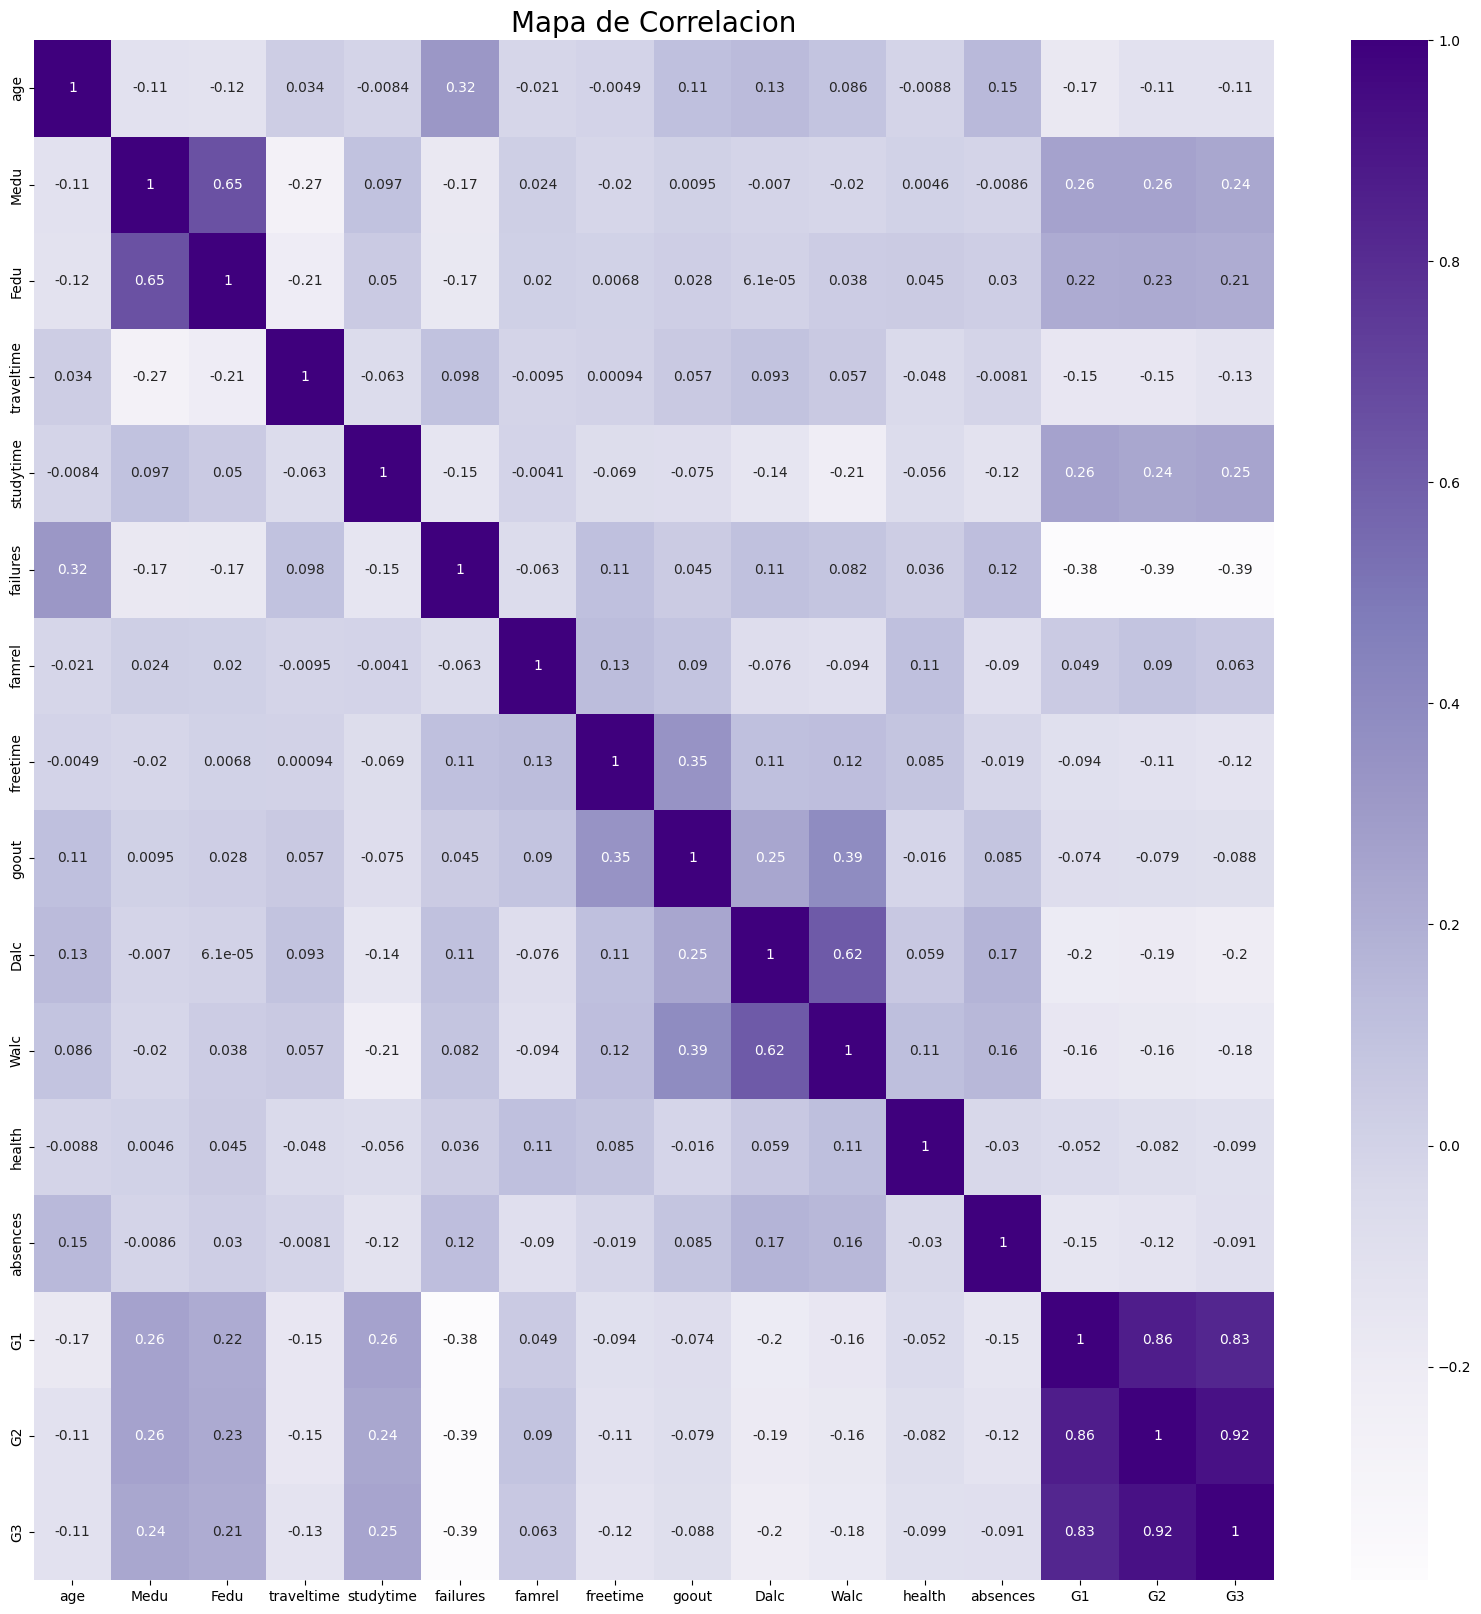

In [6]:
#se proce a graficar las correlaciones entre las distintas variables
#se puede apreciar que g1,g2,y g3 tienen alta correlacion pero se tiene que constatar que g3 es la nota final y g1,g2 la nota del 1er y segundo periodo
corr=DFE.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Purples")
plt.title('Mapa de Correlacion', fontsize=20)

##Analisis Bivariado

In [7]:
#analisis de variables categoricas
def plot_categorical_insight(categorical_columns):

    nrows, ncols = categorical_columns.shape[1], 3
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 85))

    for idx, column in enumerate(categorical_columns):
        ax = axes[idx]
        sns.countplot(data=DFE,
                      x='G3', hue=column, ax=ax[0])

        sns.countplot(data=DFE, x=column, ax=ax[1])

        sns.boxplot(data=DFE, x=column,
                    y='G3', ax=ax[2])

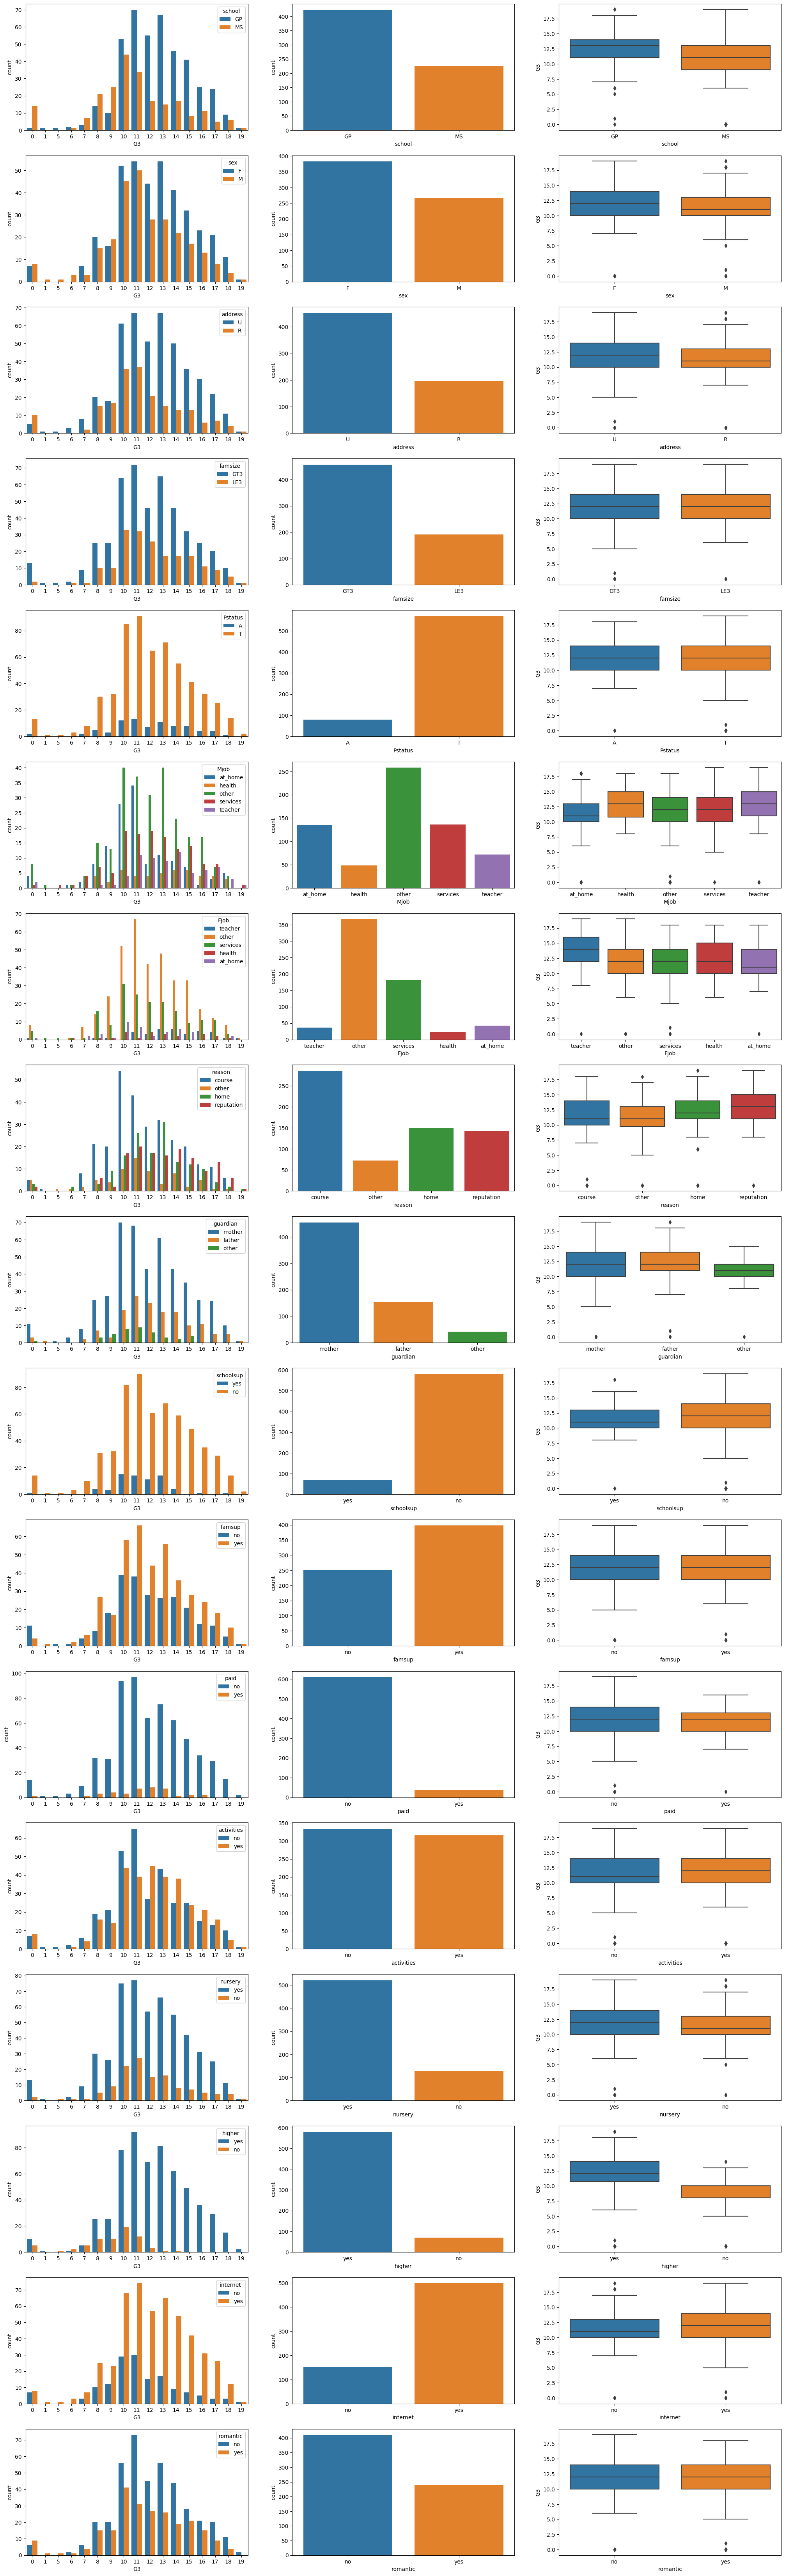

In [8]:
#analisis de variables categoricas
columns = DFE.select_dtypes(include='object')
plot_categorical_insight(columns)



De lo siguiente podemos concluir que:
*    una escuela esta arriba en cada metrica o abajo cuando se trata de reprobaciones
*   las personas femeninas reprueban mas que los masculinos(esto debido al mayor numero de poblacion) pero siguen teniendo mejor promedio en general
*   los estudiantes que viven en un area urbana tienen un mejor rendimiento qeu aquellos que viven en un area rural
*   aquellos estudiantes que tienen actividades extracurriculares les va mejor que aquellos que no
*  el acceso al internet parece tener un efecto positivo leve en el promedio d elos estudiantes
*   por los graficos obtenidos podemos decir que el tamaño del nucleo familiar no tiene mucha influencia en la nota








In [9]:
def plot_non_categorical_insight(non_categorical_columns):

    nrows, ncols = non_categorical_columns.shape[1], 2
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 100))

    for idx, column in enumerate(non_categorical_columns):
        ax = axes[idx]

        sns.scatterplot(data=DFE, x=column,
                        y='G3', ax=ax[0], hue='G3')
        
        sns.boxplot(data=DFE, x="G3",
                    y=column, ax=ax[1])

      



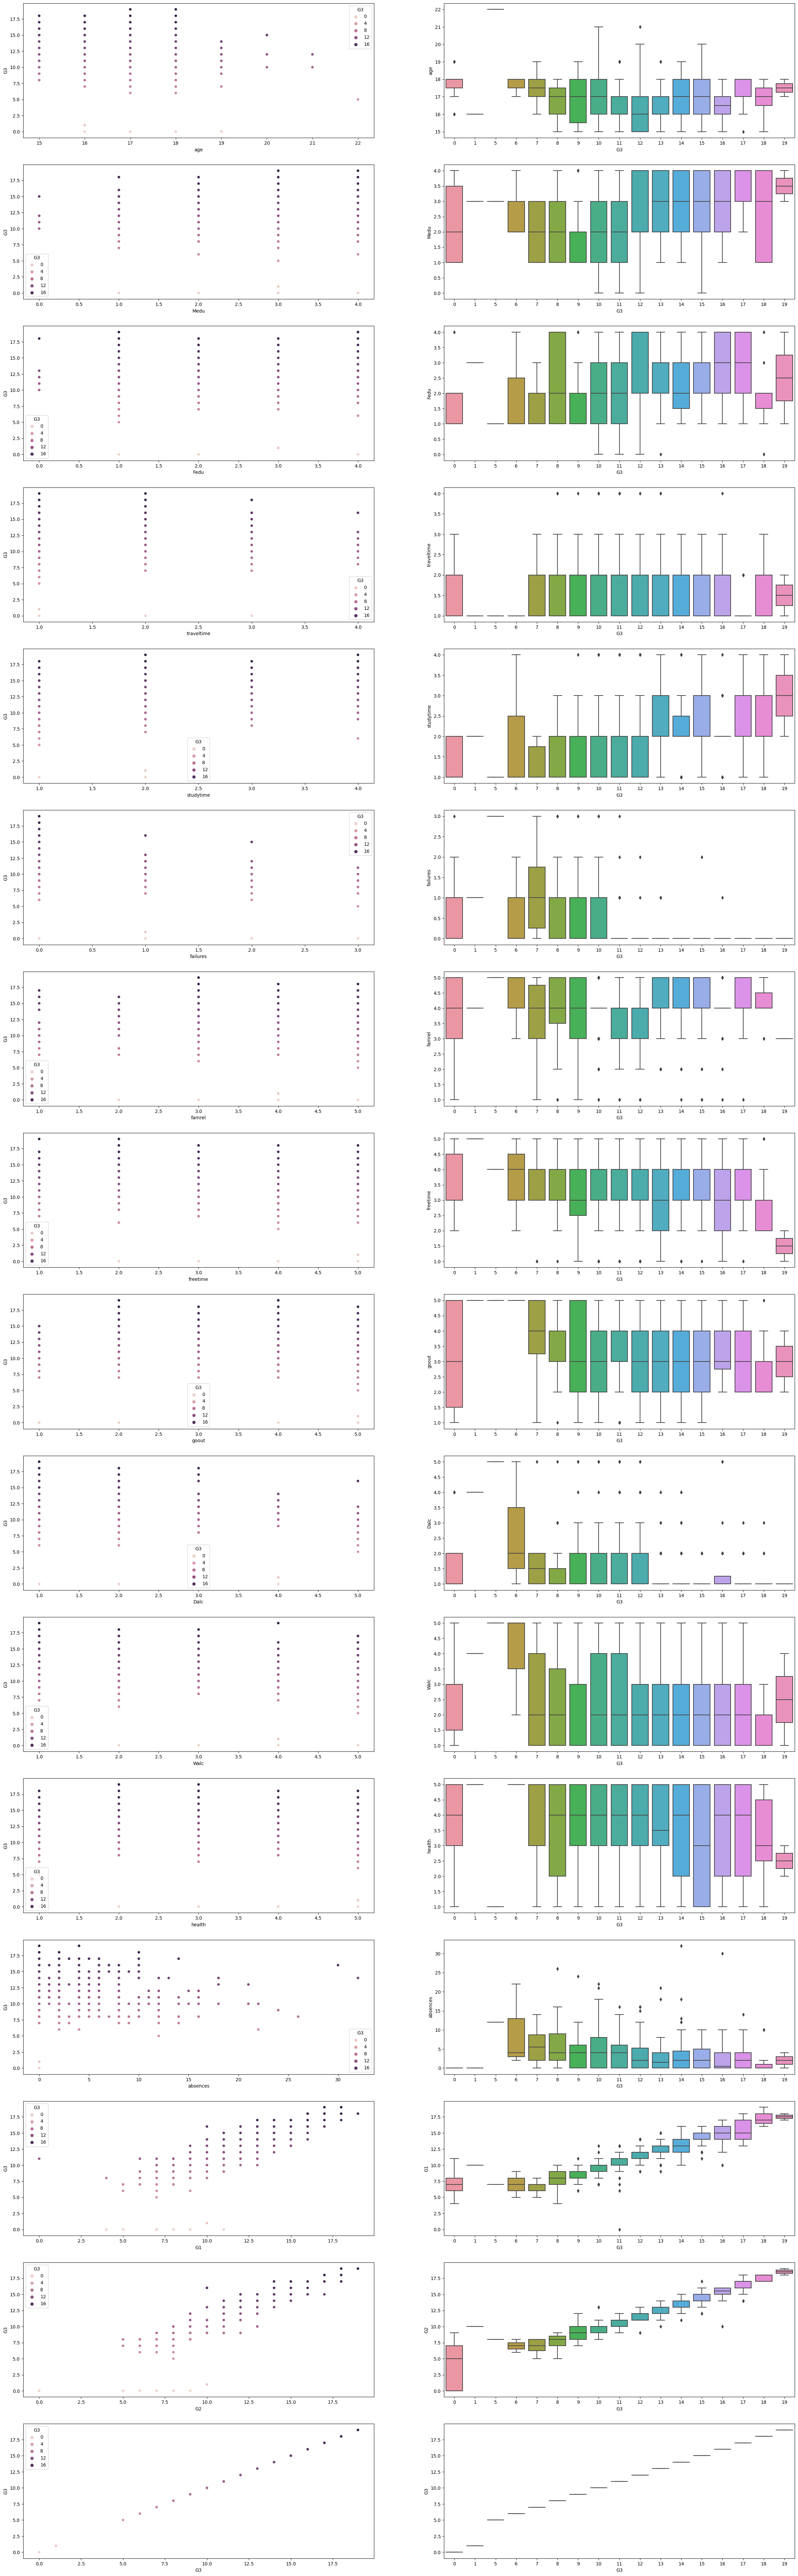

In [10]:
columns = DFE.select_dtypes(include=['int64', 'float64'])
plot_non_categorical_insight(columns)



*   interesantemente podemos ver que mientras mas cerca viven lso estudiantes de la intittucion mejores son sus notas
*   a mas alta el nivel de estudio d elos padres mejores son las notas
*   de esperarse si tus ausencias y reprobaciones son altas tus notas seran bajas
*   Elemento de la lista





##Analisis Univariado

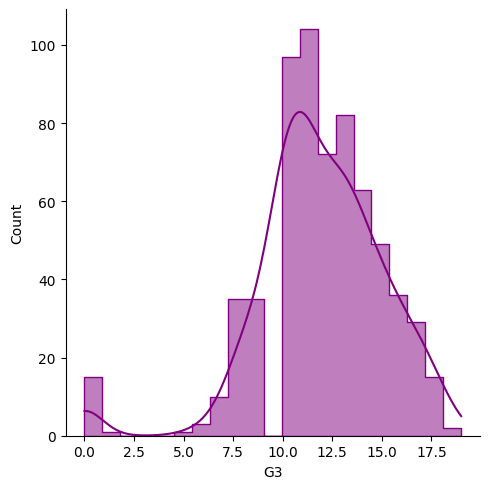

In [11]:
#Asimetria y kurtosis
sns.displot(data=DFE['G3'],
            element='step', kde=True, color='purple')

In [12]:
print(f"skewness: {DFE['G3'].skew()}")
print(f"kurtosis: {DFE['G3'].kurt()}")
#podemos decir que la destribucion de g3 es leptocúrtica ya que se posiciona por encima de la media
#y respecot a la asimetria skewnees tenemos un valor negativo lo que nos queire decir que hay mas valores diferentes a la izquierda que a la derecha


skewness: -0.9129093547157225
kurtosis: 2.7122043191041723


In [83]:
#se realiza este codigo para iterar sobre todas las columnas y de esta manera poder graficarlas todas
def boxplot_non_categorical(non_categorical_columns, colors):
    nrows, ncols = 4, 4
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))

    for idx, sliced_columns in enumerate(non_categorical_columns):
        ax = axes[idx]

        for col_idx, (column, color) in enumerate(zip(sliced_columns, colors)):
            sns.boxplot(data=DFE, x=column,
                        ax=ax[col_idx], color=color)

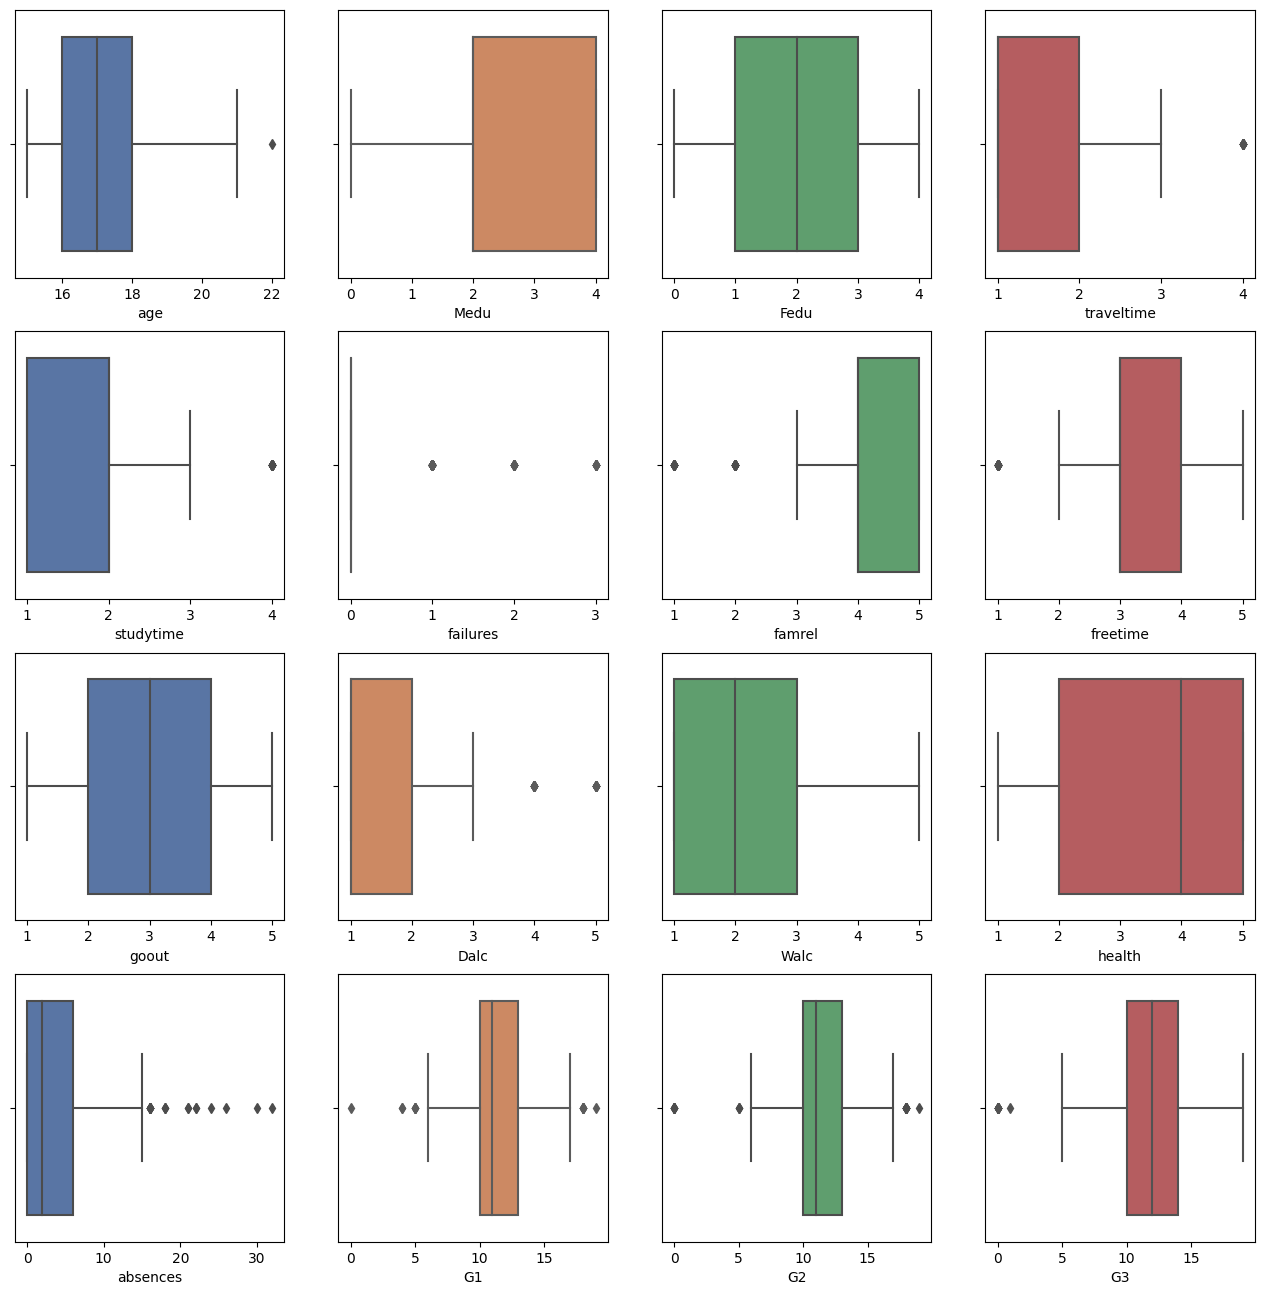

In [84]:
size = 4
sliced_columns = [column for column in columns]
sliced_columns = [sliced_columns[sliced-4:sliced]
                  for sliced in range(size, columns.shape[1] + 1, size)]

colors = ['#4c72b0', '#dd8452', '#55a868', '#c44e52']
boxplot_non_categorical(sliced_columns, colors)



*   podemos ver que el promedio normal de ausencias es de 0 a 5
*   podemos ver que los estudiantes tienen una buena relacion con sus padres
*   la edad promedio de lops estudiantes es de 16 y 18 teniendo un outlier de 22
*   la distancia de la mayoria d elos estudiantes al centro de estudiantes es de un promedio de 1 a 2 horas




# EDA con Pandas profiling

In [ ]:
profile = pp.ProfileReport(DFE,title="Analis Exploratorio de Datos")
profile.to_html()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("Proyecto Carlos Mujica")

# Feature enginering

In [ ]:
#df_num = DFE.select_dtypes('number')
#df_num.head()
#Metodo elegido para reducir la dimensionalidad del dataset

In [15]:
#se procede a visualizar el nombre de las columnas para poder encodearlas
DFE.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [16]:
#se procede a utilizar el metodo get_dummies para poder analizar las variables categorias y binarias
DFED=pd.get_dummies(DFE,columns=["sex","famsup","paid","nursery","school","address","famsize",
                                 "Pstatus","Mjob","Fjob","reason","guardian", 'schoolsup', 'activities', 'higher', 
                                 'internet', 'romantic'])
DFED

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,1,0,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,1,1,0,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,1,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,1,0,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0


In [17]:
# procedemos a imprimir para poder oberservar el estado del DF
print(DFED.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  G1                 649 non-null    int64
 14  G2                 649 non-null    int64
 15  G3                 649 non-null    int64
 16  sex_F              649 non-null    uint8
 17  sex_M           

# Detencion de Outliers

In [18]:
#antes de eliminar outliers dropeamos G1 Y G2 para no afectarlas
column_to_drop = ['G1', 'G2']
students_grades_df = DFED.drop(column_to_drop, axis=1)

In [19]:
#detencion de outliers
def detect_outliers(columns):
    outlier_indices = []
    for column in columns:
        Q1 = DFED[column].quantile(0.25)
        Q3 = DFED[column].quantile(0.75)
        IQR = Q3 - Q1  # IQR is interquartile range.

        mask = (DFED[column] >= Q1 - 1.5 *
                IQR) & (DFED[column] <= Q3 + 1.5 * IQR)
        mask = mask.to_numpy()
        false_indices = np.argwhere(~mask)
        outlier_indices.append(false_indices)
    return np.unique(np.concatenate(outlier_indices).ravel())

In [20]:
numerical_columns = ['age', 'absences', 'G3']
outlier_indices = detect_outliers(numerical_columns)

In [21]:
print(f'Number of outliers: {len(outlier_indices)}')

Number of outliers: 38


In [22]:
# Delete outliers
students_grades_df = DFED.drop(outlier_indices, axis=0)

#Entrenamiento y Testeo

## Clasificacion de Modelo

In [23]:
# hacemos un split del dataset
X, y = DFED.iloc[:, :-1], DFED.iloc[:, -1]

In [24]:
# creamos los datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##Escalado de la Data

In [25]:
def get_columns_by_category():
    categorical_mask = X.select_dtypes(
        include=['object']).apply(pd.Series.nunique) == 2
    numerical_mask = X.select_dtypes(
        include=['int64', 'float64']).apply(pd.Series.nunique) > 5

    binary_columns = X[categorical_mask.index[categorical_mask]].columns
    nominal_columns = X[categorical_mask.index[~categorical_mask]].columns
    numerical_columns = X[numerical_mask.index[numerical_mask]].columns

    return binary_columns, nominal_columns, numerical_columns

In [26]:
binary_columns, nominal_columns, numerical_columns = get_columns_by_category()

In [27]:
ordinal_encoder = OrdinalEncoder()
# ahora podemos crear un transformer pipeline
transformers = [('binary', OrdinalEncoder(), binary_columns),
                ('nominal', OneHotEncoder(), nominal_columns),
                ('numerical', StandardScaler(), numerical_columns)]
                
transformer_pipeline = ColumnTransformer(transformers, remainder='passthrough')                

In [28]:
# validacion poR medio de StratifiedKFold
Kfold = StratifiedKFold(n_splits=5)

##Clasificadores

In [29]:
#aca vamos especificando los parametros e hyper parametros de los clasificadores
RANDOM_STATE = 42
classifiers = [LogisticRegression(max_iter=70, solver='sag', random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=2, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=7, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=1, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2)
               ]

In [30]:
#con este codigo juntamos todos los clasificadores en una sola variable para poder llamarlos mas facilmente

classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes'
                     ]

pipelines = [Pipeline([('transformer', transformer_pipeline), (classifier_name, classifier)])
             for classifier_name, classifier in zip(classifiers_names, classifiers)]

##Validacion cruzada

In [31]:
def cv_fit_models():
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name, pipeline in zip(classifiers_names, pipelines):
        cv_score = cross_validate(pipeline,
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)

    return np.array(train_acc_results), cv_scores

In [32]:
#guardamos los resultados en la siguiente variable
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

In [33]:
#Aca realizamos una funcion para poder elegir el mejor resultado
def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [34]:
#aca se llama a la funcion anterior para definirse de acuerdo a los mejores resultados
best_estimators = pick_best_estimator()

In [35]:
#se busca devolver los resultados de test, la precicision y el recall
def gather_metrics_scores():
    test_accs, precisions, recalls = [], [], []
    for estimator_val in best_estimators.values():
        estimator = estimator_val[0]
        y_pred = estimator.predict(X_test)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        score = estimator.score(X_test, y_test)

        test_accs.append(score)
        precisions.append(precision)
        recalls.append(recall)
        
    scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}
    
    return scores

###Resultados de la evaluacion

In [36]:
scores = gather_metrics_scores()

In [37]:
def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

In [38]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

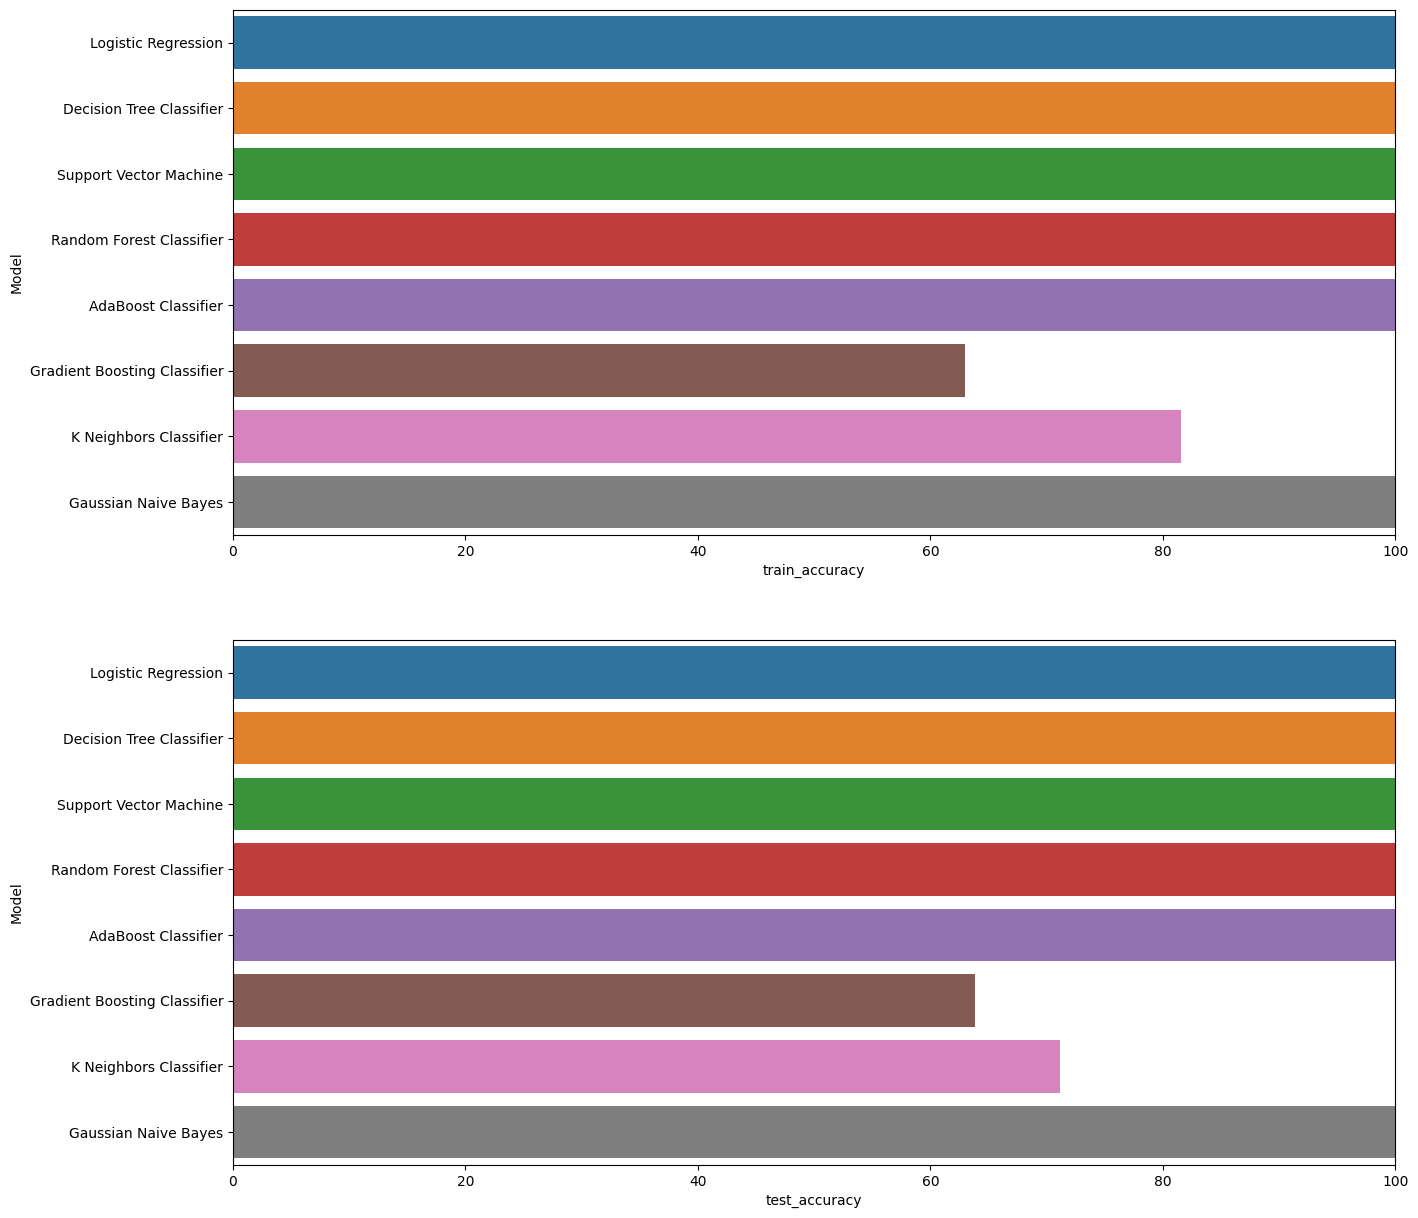

In [39]:
plot_train_test_accuracy(results_df)

In [40]:
def plot_precision_recall(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='test_precision',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_recall',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

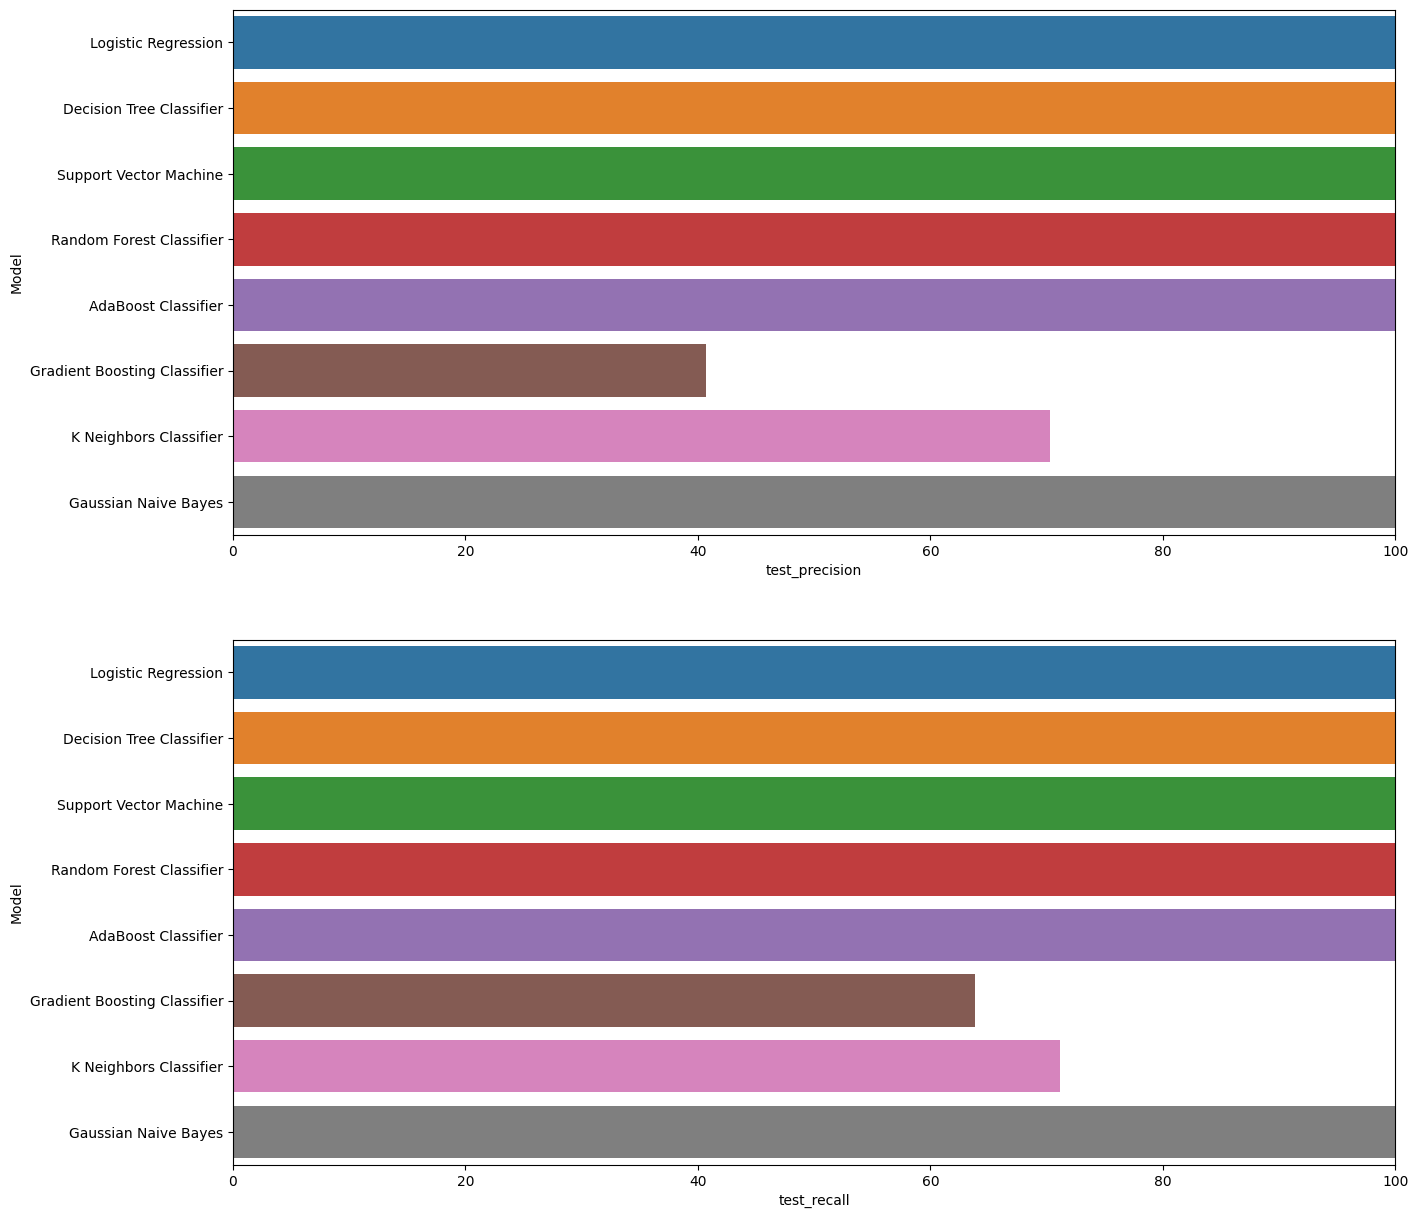

In [41]:
plot_precision_recall(results_df)



*  Tenemos que support vector machine se adapta muy bien probablemente por overfitting por que son muy pocas filas
*   por lo tanto se procedera con random forest



##Otimizacion manual

In [42]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'max_depth': 10}

In [43]:
# Modelo 1
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')

[01:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

Accuracy para Modelo 1 = 1.0
[01:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

Accuracy para Modelo 2 = 1.0
[01:36:59] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.

Accuracy para Modelo 3 = 1.0


# Optimizacion utilizando Gridsearch

In [44]:
rfc = RandomForestClassifier(random_state=0)

In [45]:
param_grid = { 
    'n_estimators': [ 200,300],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}

In [46]:
#Variable a predecir
pred = DFED['G3']
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(DFED,pred )
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [57]:
rfc1=RandomForestClassifier(random_state=0, n_estimators= 200, criterion = 'gini',max_features = 'auto',max_depth = 8)
rfc1.fit(DFED,pred )
print("Mejores Parametros", CV_rfc.best_params_)
print("Mejor CV score", CV_rfc.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')


Mejores Parametros {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Mejor CV score 0.7535002981514609
Accuracy del modelo = 1.0


In [55]:
grid_cv = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

[01:56:55] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.

Mejores Parametros {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
Mejor CV score 1.0
Accuracy del modelo = 1.0


In [56]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.619956,0.238122,0.019069,0.008745,gini,6,auto,200,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
1,0.354345,0.005533,0.007666,0.000660,gini,6,auto,300,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
2,0.223584,0.003034,0.006863,0.000061,gini,6,sqrt,200,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
3,0.336211,0.010174,0.007460,0.000506,gini,6,sqrt,300,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
4,0.229825,0.008151,0.007018,0.000110,gini,7,auto,200,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
5,0.327944,0.005627,0.007076,0.000049,gini,7,auto,300,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
6,0.233441,0.011446,0.007058,0.000246,gini,7,sqrt,200,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
7,0.336450,0.007476,0.007113,0.000131,gini,7,sqrt,300,"{'criterion': 'gini', 'max_depth': 7, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
8,0.267927,0.038020,0.007746,0.001330,gini,8,auto,200,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1
9,0.642300,0.088280,0.014423,0.000627,gini,8,auto,300,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",1.0,1.0,1.0,1.0,0.0,1


In [58]:
#esto es para graficar como es las distribucion de las predicciones
pred3= rfc1.predict(DFED)
print(pred3)

[11 11 12 14 13 13 13 13 17 13 14 13 12 13 15 17 14 14  7 12 14 12 14 10
 10 12 12 11 13 12 11 15 15 12 12 11 14 13 12 12 10 11 15 10 11 11 13 17
 13 12 13 16  9 12 13 12 15 16 14 16 16 16 10 13 12 16 12 10 11 15 11 10
 11 14 11 11 11 13 10 11 12  9 11 13 12 12 11 15 11 10 11 13 12 14 12 13
 11 12 13 13  8 16 12 10 16 10 10 14 11 14 14 11 10 18 10 14 16 15 11 14
 14 13 13 13 11  9 11 11 15 13 12  8 11 13 12 14 11 11 11 15 10 13 12 11
 11 10 10 14  9 11  9 13 11 13 11 10 12 10 11 13 11  8 11  0 10 13 11 13
  8 10 11 11  1 10  9  8 10  8  8  8 11 18 13 17 10 18 10 13 15 11 14 10
 11 13 11 13 17 14 16 14 11 16 14 10 13 12 12 10 12 16 14 12 16 11 15 12
 15 13 13  8 12 15 13 12 12 12 13 11 11 15 10 10 13 13 11 12 14 10 16  8
 17 11 11 16 12 13 13 14 10 12 16 10 13 10 10  7  8  9 15 10 11 13  8  8
 10 15 14 15 12 15 15 12 15 11 10 11 16 11 13  5 10 11  7 10  6 12 13 10
 13 17 11 11 14 14 13 14 16 10 12 12 15 11 12 13 13  9 16 14 12 14 10 12
 16 13 18 15 16 12 10 12 13 15 10 10 11 10 13 18 13

In [59]:
#esto es para poner en un archivo cvs los datos de las predicciones
pred_test = pred3
output = pd.DataFrame({'G3': DFED.G3, 'G3': pred_test})
output.to_csv('./submission.csv', index=False)

In [60]:
SUBM=pd.read_csv("/content/submission.csv")

In [61]:
#podemos observar en la predicciones que la nota mediana es 11.9
SUBM.describe(include="all")

,G3
count,649.000000
mean,11.909091
std,3.217342
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000
